## Black-Scholes Model


The purpose of this notebooks is to review the Black-Scholes model in the context of equity derivatives without dividends.

#### Contents

- European Option definition
- B-S Model Assumptions
- BS-Equation Derivation and Solution
- Put-Call Parity

In [11]:
# Imports
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Optional Configuration
import seaborn as sns 
sns.set(style="whitegrid")

%config InlineBackend.figure_format = 'retina'
%config Completer.use_jedi = False

## European Option

An option is a contract which conveys to its owner, the holder, the right, but not the obligation, to buy (Call) or sell (Put) an underlying asset or instrument at a specified strike price $K$ on or before a specified expiry date $T$, depending on the style of the option. 




The key difference between American and European options relates to when the options can be exercised:

- A European option may be exercised only at the expiration date of the option $T$.
- An American option on the other hand may be exercised at any time before the expiration date.

For European options, the payoff—when it occurs—is given by

$$Call \ \ Payoff = (S_T - K)^{+}$$

$$Put \ \  Payoff = (K - S_T)^{+},$$

where $K$ is the strike price and $S_T$ is the price of the underlying asset at the time of exercise.

Consider an European option with strike given by $K$. Then, its payoff as a function of the the underlying price at the expiry $S_T$ is illustrated by the following function.

In [13]:
def draw_payoff(K):

    S = K
    underlying_prices = np.linspace(.0,  2*S, 100)
    values_call = [np.maximum(s - K, 0) for s in underlying_prices]
    values_put = [np.maximum(K-s, 0) for s in underlying_prices]

    plt.figure()
    plt.plot(underlying_prices, values_call, lw=1.,
             color="maroon", label="European Call")
    plt.plot(underlying_prices, values_put, lw=1.,
             color="cornflowerblue", label="European Put")
    plt.xlabel('$S_T$')
    plt.ylabel('Payoff')
    plt.title(f'European Option with strike $K$={K}')
    plt.legend()
    plt.show()

If $K=100$, then we have

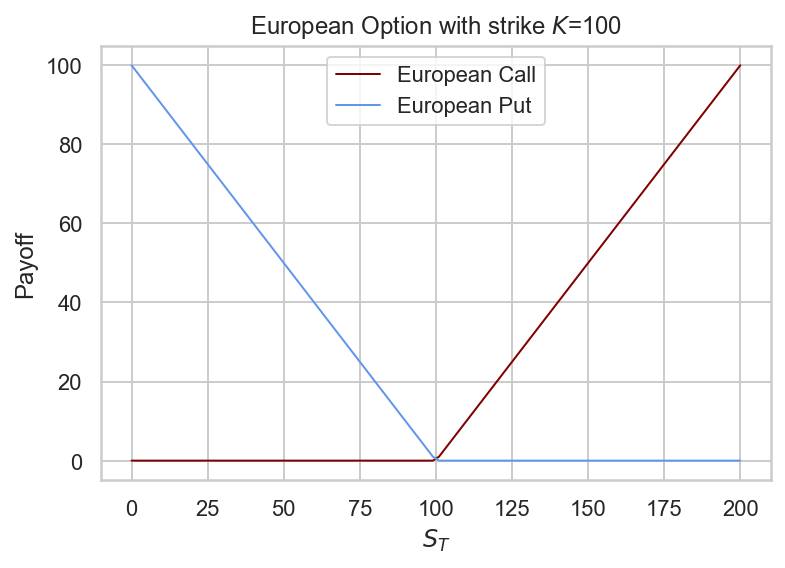

In [14]:
draw_payoff(K=100)

If $K=50$, then we have

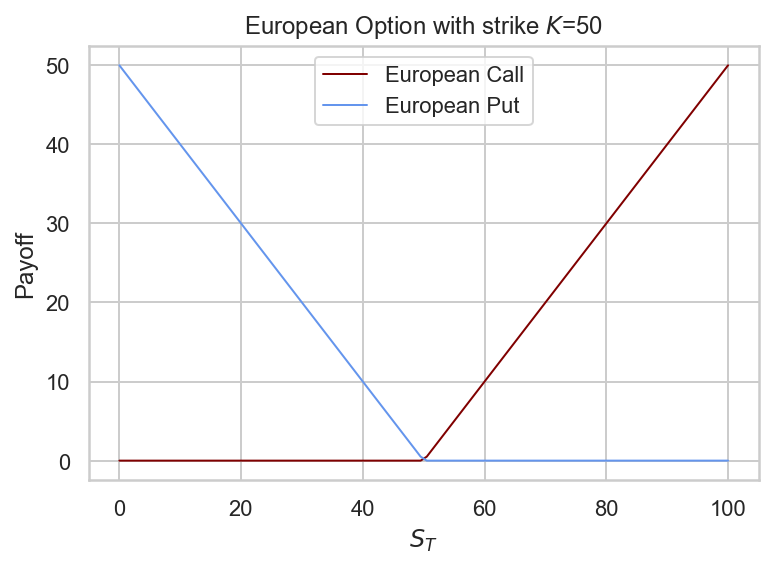

In [15]:
draw_payoff(K=50)

### Black-Scholes Model Assumptions

#### Assumptions

- (A1) The risk-free interest rate $r$ is known and constant through time
- (A2) The underlying asset/stock price $S$ follows a Geometric Brownian motion with constant parameters $\mu$ and $\sigma$, under a certain probability measure $\mathbb{P}$
- (A3) Stock pays no dividends
- (A4) The option can only be exercised at expiration i.e. it is a European type
- (A5) There are no transaction costs
- (A6) Fractional trading is possible


### Black-Scholes Equation Derivation
To derive the famous equation, the idea is to construct a self-financing portfolio with one option and $\Delta$ units of the underlying stock. So, the value of the portfolio at a given time $t$ is given by
$$\Pi_t = V_t + \Delta S_t,$$
and must satisfy the following two conditions:
- (C1) The portfolio is riskless
- (C2) The portfolio earns the risk free rate

Using assumption (A2)
$$dS_t = \mu S_t dt + \sigma S_t dW_t^{\mathbb{P}},$$
and Ito's formula applied to the function $V(t, S)$, we obtain
\begin{align*}
d \Pi_t &= dV_t + \Delta dS_t\\
&= \left[ \frac{\partial V}{\partial t} + \frac{\partial V}{\partial S} \mu S  + \frac{1}{2}\frac{\partial^2 V}{\partial S^2} \sigma^2 S^2 \right] dt +  \frac{\partial V}{\partial S} \sigma SdW_t^{\mathbb{P}} +    \Delta  dS_t\\
&= \left[ \frac{\partial V}{\partial t} + \frac{\partial V}{\partial S} \mu S  + \frac{1}{2}\frac{\partial^2 V}{\partial S^2} \sigma^2 S^2 \right] dt +  \frac{\partial V}{\partial S} \sigma SdW_t^{\mathbb{P}} +    \Delta  \mu S dt + \Delta \sigma SdW_t^{\mathbb{P}}\\
&= \left[ \frac{\partial V}{\partial t} + \frac{\partial V}{\partial S} \mu S  + \frac{1}{2}\frac{\partial^2 V}{\partial S^2} \sigma^2 S^2 +  \Delta  \mu S \right] dt +  \left[ \frac{\partial V}{\partial S} \sigma S +  \Delta \sigma S \right] dW_t^{\mathbb{P}}\\
&= \left[ \frac{\partial V}{\partial t} + \frac{\partial V}{\partial S} \mu S  + \frac{1}{2}\frac{\partial^2 V}{\partial S^2} \sigma^2 S^2  + \Delta  \mu S \right] dt +  \left[ \frac{\partial V}{\partial S}  +  \Delta \right] \sigma S dW_t^{\mathbb{P}}.\\
\end{align*}


Condition (C1) implies that the second term in the last expression should be equal zero. 

Thus, taking $\Delta = -\frac{\partial V}{\partial S}$ we obtain

\begin{align*}
d\Pi_t &= \left[ \frac{\partial V}{\partial t} + \frac{1}{2}\frac{\partial^2 V}{\partial S^2} \sigma^2 S^2 \right] dt.
\end{align*}

On the other hand, condition (C2) implies
\begin{align*}
d\Pi_t &= r \Pi_t dt = r \left[  V_t -\frac{\partial V}{\partial S} S_t \right].
\end{align*}

Combining the last two equations we obtain

\begin{align*}
\frac{\partial V}{\partial t} + \frac{1}{2}\frac{\partial^2 V}{\partial S^2} \sigma^2 S^2  = r\left[  V_t -\frac{\partial V}{\partial S} S_t \right]dt,
\end{align*}

from which we can derive the following partial differential equation (PDE)

\begin{align*}
\frac{\partial V}{\partial t} + \frac{1}{2} \sigma^2 S^2  \frac{\partial^2 V}{\partial S^2} + r S_t\frac{\partial V}{\partial S}     - r  V_t  = 0 .
\end{align*}

Adding the final condition, which comes from (A4), we obtain the famous second order parabollic partial differential equation with boundary condition
\begin{align*}
\frac{\partial V}{\partial t}  + r^d S_t\frac{\partial V}{\partial S} + \frac{1}{2} \sigma^2 S^2  \frac{\partial^2 V}{\partial S^2}    - r V_t  &= 0, \qquad \qquad t \in [0,T]\\
V_T =  (S_T - &  K)^{+} .
\end{align*}

### Solution

The solution to this PDE with boundary condition is given by
\begin{align*}
V(S_t, t) = \Phi(d_1) S_t - \Phi(d_2)K e^{-r(T-t)},
\end{align*}
where
\begin{align*}
d_1 & = \dfrac{1}{\sigma \sqrt{T-t}} \left[ \ln \left(\frac{S_t}{K} \right) + \left( r + \dfrac{\sigma^2}{2}\right) (T-t)  \right]\\
d_2 & = d_1 - \sigma\sqrt{T-t},
\end{align*}
and $\Phi$ denotes the cumulative distribution function (cdf) of a standard normal distribution.

## Solution via the Heat Equation

See the original paper: [The Pricing of Options and Corporate Liabilities
Author(s): Fischer Black and Myron Scholes](https://www.cs.princeton.edu/courses/archive/fall09/cos323/papers/black_scholes73.pdf)

## Solution via Feynman-Kac

[Feynman-Kac formula](https://en.wikipedia.org/wiki/Feynman–Kac_formula) guarantess that the solution to the PDE can be written as the following conditional expectation
\begin{align*}
V(S_t, t) &= \mathbb{E}^{\mathbb{Q}}\left[ e^{-r(T-t)} (S_T- K)^{+} | S_t \right], 
\end{align*}
where $S$ is a stochastic process 
under the [probability measure](https://en.wikipedia.org/wiki/Probability_measure) $\mathbb{Q}$ which satisfies the following stochastic differential equation (SDE)
\begin{align*}
dS_t = r S_t dt + \sigma S_t dW^{\mathbb{Q}}_t. 
\end{align*}

From the last expression, we can see that $S$ is a geometric Brownian motion! So, from yesterday's class we know its properties.

Le'ts calculate the expectation that we obtained from the [Feynman-Kac formula](https://en.wikipedia.org/wiki/Feynman–Kac_formula)

\begin{align*}
V(S_t, t) &= \mathbb{E}_t^{\mathbb{Q}}\left[ e^{-r(T-t)} (S_T- K)^{+} \right ]\\
 &= e^{-r(T-t)} \mathbb{E}_t^{\mathbb{Q}}\left[  (S_T- K)^{+} \right ]\\
 &= e^{-r(T-t)} \mathbb{E}_t^{\mathbb{Q}}\left[ 1_{[K,\infty)} (S_T) (S_T- K) \right ]\\
 &= e^{-r(T-t)} \left\{   \mathbb{E}_t^{\mathbb{Q}}\left[ 1_{[K,\infty)} (S_T)S_T \right ] - K \mathbb{Q}\left(S_T|S_t \geq K \right ) \right\}.
\end{align*}

So, we can write it like
$$V(S_t, t) = e^{-r(T-t)} \left( E_1 - K E_2  \right),$$

where 

$$E_1 = \mathbb{E}_t^{\mathbb{Q}}\left[ 1_{[K,\infty)} (S_T)S_T \right ]$$

$$E_2 =  \mathbb{Q}\left(S_T|S_t \geq K \right ).$$


To calculate $E_1$ and $E_2$ let's make some observations:
 
(1) Under the probability measure $\mathbb{Q}$ the process $S$ is also a geometric Brownian motion. So, Ito's formula implies that

$$\ln(S_T)  = \ln (S_t) +  \left( r-\frac{1}{2}\sigma^2 \right)(T-t)  + \sigma (W_T^{\mathbb{Q}} - W_t^{\mathbb{Q}}).$$
Hence
$$\ln(S_T) |S_t \sim \mathcal{N}\left( \ln(S_t) +  \left( r-\frac{1}{2}\sigma^2 \right)(T-t),\sigma^2(T-t) \right),$$ 
or equivalently
$$S_T |S_t \sim LogNormal\left(\ln(S_t) +  \left( r-\frac{1}{2}\sigma^2 \right)(T-t),\sigma^2(T-t)\right).$$

(2) Recall that the probability density function (pdf) of a [log-normal distribution](https://en.wikipedia.org/wiki/Log-normal_distribution) $Lognorma(\mu, \sigma^2)$ is given by
$$
p(x) = {\displaystyle {\frac {1}{x\sigma {\sqrt {2\pi }}}}\ \exp \left(-{\frac {\left(\ln \left(x\right)-\mu \right)^{2}}{2\sigma ^{2}}}\right)}.
$$

With these observations, we have all the tools to calculate $E_1$ and $E_2$. Let's start with $E_2$ for being the simplests one:

\begin{align*}
E_2 &= \mathbb{Q}\left(S_T \geq K \right ) \\ 
&= \mathbb{Q}\left(\ln (S_T) \geq \ln(K) \right ) \\
&= 1 - \mathbb{Q}\left(\log (S_T) \leq \ln(K) \right ) \\
&= 1 - \Phi \left(  \frac{ \log(K)  - \ln(S_t) -  \left( r - \frac{1}{2}\sigma^2 \right) }{\sigma \sqrt{(T-t)}} \right) \\
&= \Phi \left(  \frac{1}{\sigma \sqrt{(T-t)}} \left[ \ln(S_t/K)  +  \left( r - \frac{1}{2}\sigma^2 \right) \right] \right) \\
\end{align*}

Now, let's calculate $E_1$

\begin{align*}
E_1 &= \mathbb{E}_t^{\mathbb{Q}}\left[ 1_{[K,\infty)} (S_T)S_T \right ] \\ 
& = \int_K^{\infty} s {\frac {1}{s \sigma\sqrt{T-t} {\sqrt {2\pi }}}}\ \exp \left(-{\frac {\left(\ln \left(s\right)-\ln(S_t) -(r-\frac{1}{2}\sigma^2)(T-t)  \right)^{2}}{2\sigma ^{2}(T-t)  }}\right) ds\\
& = \int_K^{\infty}  {\frac {1}{ \sigma\sqrt{T-t} {\sqrt {2\pi }}}}\ \exp \left(-{\frac {\left(\ln \left(s\right)-\ln(S_t) -(r-\frac{1}{2}\sigma^2) \right)^{2}(T-t)}{2\sigma ^{2}(T-t)  }}\right) ds \\
& =\frac {1}{\sigma \sqrt {2\pi }  \sqrt{T-t} } \int_K^{\infty}   \exp \left(-{\frac {\left[\ln (s/S_t) -(r-\frac{1}{2}\sigma^2)(T-t) \right]^{2}}{2\sigma ^{2}(T-t)  }}\right) ds \\
& =\frac {1}{\sigma\sqrt{T-t} \sqrt {2\pi }   } \int_K^{\infty}   \exp \left(  -\frac{1}{2}  {\left[\frac{ \ln (s/S_t) -(r-\frac{1}{2}\sigma^2)(T-t)}{\sigma\sqrt{T-t}}\right]^{2}} \right) ds 
\end{align*}

We need a change of variable

$z = \left[\frac{ \ln (s/S_t) -(r-\frac{1}{2}\sigma^2)(T-t)}{\sigma\sqrt{T-t}}\right] - \sigma\sqrt{T-t}$


$z = \frac{\ln (s/S_t) -(r-\frac{1}{2}\sigma^2)(T-t)-\sigma^2(T-t) }{\sigma\sqrt{T-t}}= \frac{\ln (s/S_t) -(r+\frac{1}{2}\sigma^2)(T-t) }{\sigma\sqrt{T-t}}$

If $s=K$, then
$z =  \frac{\ln (K/S_t) -(r+\frac{1}{2}\sigma^2)(T-t) }{\sigma\sqrt{T-t}}$


$s = S_t\exp\left[ z\sigma\sqrt{T-t}  +(r+\frac{1}{2}\sigma^2)(T-t) \right] $



$dz =  \frac{1}{{\sigma\sqrt{T-t}}} \frac{ds}{s}$

$  {\sigma\sqrt{T-t}} S_t\exp\left[ z\sigma\sqrt{T-t}  +(r+\frac{1}{2}\sigma^2)(T-t) \right]  dz = ds$

Then

\begin{align*}
E_1 
& =\frac {1}{\sigma\sqrt{T-t} \sqrt {2\pi }   } \int_K^{\infty}   \exp \left(  -\frac{1}{2}  {\left[\frac{ \ln (s/S_t) -(r-\frac{1}{2}\sigma^2)(T-t)}{\sigma\sqrt{T-t}}\right]^{2}} \right) ds \\
& = \frac {1}{\sigma\sqrt{T-t} \sqrt {2\pi }   } \int_{K^*}^{\infty}   \exp \left(  -\frac{1}{2}  {\left[z+\sigma\sqrt{T-t}\right]^{2}} \right) {\sigma\sqrt{T-t}} S_t\exp\left[ z\sigma\sqrt{T-t}  +(r+\frac{1}{2}\sigma^2)(T-t) \right]  dz \\
& = \frac {1}{\sqrt {2\pi }   } \int_{K^*}^{\infty}   \exp \left(  -\frac{1}{2}  {\left[z+\sigma\sqrt{T-t}\right]^{2}} \right)  S_t\exp\left[ z\sigma\sqrt{T-t}  +(r+\frac{1}{2}\sigma^2)(T-t) \right]  dz \\
& =S_t\exp\left[ (r+\frac{1}{2}\sigma^2)(T-t) \right]  \frac {1}{\sqrt {2\pi }   } \int_{K^*}^{\infty}   \exp \left(  -\frac{1}{2}  {\left[z+\sigma\sqrt{T-t}\right]^{2}} \right)  \exp\left[ z\sigma\sqrt{T-t}\right]  dz \\
& =S_t\exp\left[ (r+\frac{1}{2}\sigma^2)(T-t) \right] \exp\left[ -\frac{1}{2} \sigma^2 (T-t)\right] \frac {1}{\sqrt {2\pi }   } \int_{K^*}^{\infty}   \exp \left(  -\frac{1}{2}  {z^{2}} \right)    dz \\
& =S_t\exp\left[ r(T-t) \right]  \frac {1}{\sqrt {2\pi }   } \int_{K^*}^{\infty}   \exp \left(  -\frac{1}{2}  {z^{2}} \right)    dz \\
& = S_t\exp\left[ r(T-t) \right]   (1 - \Phi(K^{*}))    \\
& = S_t\exp\left[ r(T-t) \right]     \Phi(-K^{*})   \\
& =S_t\exp\left[ r(T-t) \right]   \Phi \left( \frac{1}{\sigma\sqrt{T-t}} \left[ \ln (S_t/K) +(r+\frac{1}{2}\sigma^2)(T-t) \right] \right)
\end{align*}

So, we have

\begin{align*}
V(S_t, t) & = e^{-r(T-t)} \left( E_1 - K E_2  \right) \\
& =  e^{-r(T-t)} \left\{   S_t e^{r(T-t)}  \Phi \left( \frac{1}{\sigma\sqrt{T-t}} \left[ \ln (S_t/K) +(r+\frac{1}{2}\sigma^2)(T-t) \right] \right) - K \Phi \left(  \frac{1}{\sigma \sqrt{(T-t)}} \left[ \ln(S_t/K)  +  \left( r - \frac{1}{2}\sigma^2 \right) \right] \right)   \right\}\\
& = S_t \Phi(d_1) - e^{-r(T-t)} K\Phi(d_2)\\
& = \Phi(d_1) S_T - \Phi(d_2) e^{-r(T-t)} K
\end{align*}

and we have arrived to the Black-Scholes formula!

### Put-Call Parity

In financial mathematics, put–call parity defines a relationship between the price of a European call option and European put option, both with the identical strike price and expiry, namely that a portfolio of a long call option and a short put option is equivalent to (and hence has the same value as) a single forward contract at this strike price and expiry. This is because if the price at expiry is above the strike price, the call will be exercised, while if it is below, the put will be exercised, and thus in either case one unit of the asset will be purchased for the strike price, exactly as in a forward contract.


$$Call - Put = S - Ke^{-r(T-t)}.$$


In [16]:
from scipy.stats import norm

def BS_formula(payoff="call", S=100., K=100., tau=1., r=0.1, sigma=0.2):
    # Here tau = T-t Time to expiration

    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*(tau))/(sigma*np.sqrt(tau))
    d2 = d1 - sigma*np.sqrt(tau)

    if payoff == "call":
        price = norm.cdf(d1)*S - norm.cdf(d2)*K*np.exp(-r*tau)
    elif payoff=="put":
        price = -norm.cdf(-d1)*S + norm.cdf(-d2)*K*np.exp(-r*tau)
    else:
        raise ValueError("Payoff not implemented. Set 'call' or 'put'")

    return price

In [17]:
S=100.0     # St spot stock price
K=100.0     # strike
tau=1.0     # T-t
r=0.1       # risk free rate 
sigma=0.2   # diffusion coefficient or volatility

call = BS_formula("call", S, K, tau, r, sigma)
put = BS_formula("put", S, K, tau, r, sigma)

print(f'Call Price {call}')
print(f'Put price {put}')

Call Price 13.269676584660886
Put price 3.753418388256833


In [18]:
assert( call - put == S - K*np.exp(-r*tau) )